# Dissertation Analytics
## 2. Basic analyses

This notebook runs some basic analyses on my dissertation _Emotions as functional kinds: a meta-theoretical approach to constructing scientific theories of emotions_ (HU Berlin). 

In [13]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Color palette
sns.set_palette(sns.color_palette("Blues"))

In [2]:
with open('diss_lemmatized.txt') as f:
    text = ast.literal_eval(f.read())
    
with open('diss_nostopwords.txt') as f:
    text_tagged = ast.literal_eval(f.read())

## Word frequency

We can calculate the frequency of all words in the text.

In [3]:
from nltk import FreqDist

In [4]:
fdist = FreqDist(text)

In [5]:
fdist.most_common(20)

[('emotion', 1722),
 ('kind', 800),
 ('theory', 490),
 ('case', 351),
 ('term', 321),
 ('scientific', 318),
 ('account', 313),
 ('pattern', 290),
 ('category', 279),
 ('claim', 274),
 ('different', 268),
 ('concept', 265),
 ('view', 251),
 ('functional', 244),
 ('make', 219),
 ('natural', 198),
 ('phenomenon', 197),
 ('Challenge', 192),
 ('explain', 186),
 ('property', 181)]

We can also look up the most common nouns in the text.

In [6]:
def isnoun(word):
    return word == 'NNP' or word == 'NN' or word == 'NNS' or word == 'NNPS'

In [8]:
# import nltk
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/juanrloaiza/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from collections import defaultdict
freq_nouns = defaultdict(int)

for sentence in text_tagged:
    for word in sentence:
        if isnoun(word[1]):
            if len(word[0]) > 2:
                # Let's only count the lemmatized version.
                freq_nouns[lemmatizer.lemmatize(word[0], pos='n')] += 1

In [10]:
freq_nouns_df = pd.DataFrame.from_dict(freq_nouns, orient='index', columns=['Frequency'])

In [11]:
nouns_best20 = freq_nouns_df.sort_values('Frequency', ascending=False)[:20].reset_index()
nouns_best20.columns = ['Word', 'Frequency']

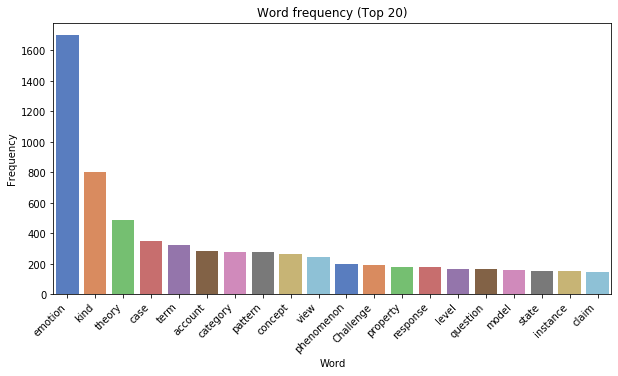

In [14]:
plt.figure(figsize=(10, 5))
g = sns.barplot(data=nouns_best20, x='Word', y='Frequency', palette="muted")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Word frequency (Top 20)')
plt.savefig('word_freq.png', dpi=100, bbox_inches='tight')

## Collocations

In [15]:
import nltk
from nltk.collocations import *

### Bigrams

In [16]:
text_bigrams = nltk.bigrams(text)
bigrams_freq = FreqDist(text_bigrams)

In [17]:
bigrams_df = pd.DataFrame(bigrams_freq.most_common(20), columns=['Bigram', 'Frequency'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: x[0]+' '+x[1])

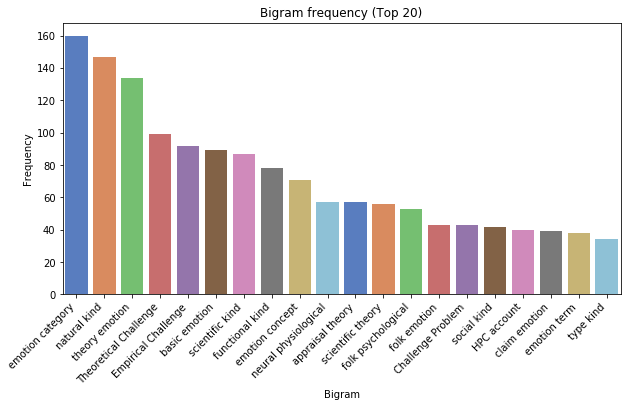

In [18]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=bigrams_df, x='Bigram', y='Frequency', palette="muted")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Bigram frequency (Top 20)')
plt.savefig('bigram_freq.png', dpi=100, bbox_inches='tight')

### Trigrams

In [19]:
text_trigrams = nltk.trigrams(text)
trigrams_freq = FreqDist(text_trigrams)

In [20]:
trigrams_df = pd.DataFrame(trigrams_freq.most_common(20), columns=['Trigram', 'Frequency'])
trigrams_df['Trigram'] = trigrams_df['Trigram'].apply(lambda x: x[0]+' '+ x[1] + ' ' + x[2])

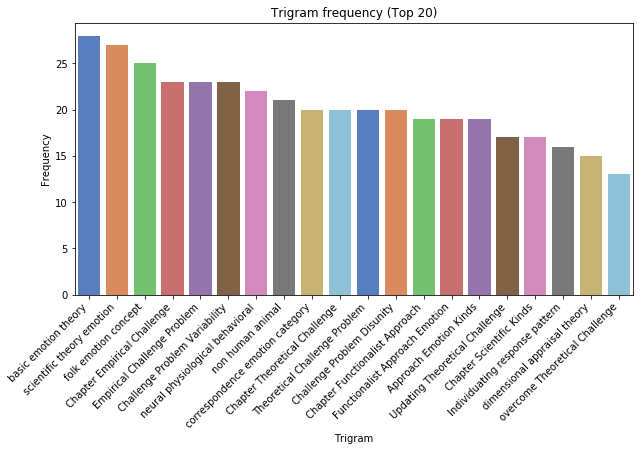

In [21]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=trigrams_df, x='Trigram', y='Frequency', palette="muted")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Trigram frequency (Top 20)')
plt.savefig('trigram_freq.png', dpi=100, bbox_inches='tight')

## Most cited

In [175]:
# We open the bibtex file for the whole dissertation
import bibtexparser

with open('main.bib') as f:
    bib = bibtexparser.load(f)

Entry type website not standard. Not considered.


In [180]:
bibtex_ids = [entry['ID'] for entry in bib.entries]

In [183]:
import os

# We load each chapter of the dissertation in .tex format
tex = ''
for filename in os.listdir(os.getcwd() + '/tex/'):
    with open('tex/' + filename) as f:
        tex += f.read()

In [186]:
# Count entries
bibCount = {}
for entry in bibtex_ids:
    bibCount[entry] = len(re.findall(entry, tex))

In [213]:
citation_df = pd.DataFrame(bibCount.items(), columns = ['Reference', 'Count'])

In [235]:
top_citations = citation_df.sort_values('Count', ascending = False).head(20)

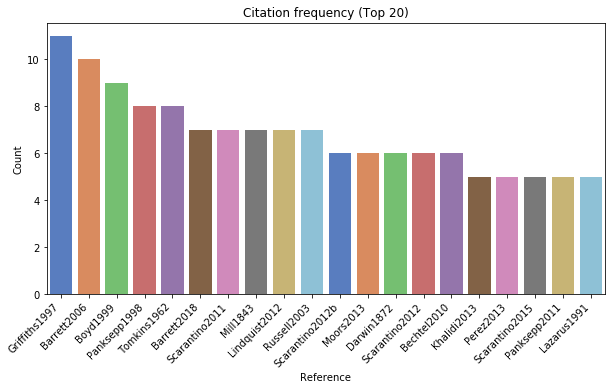

In [236]:
plt.figure(figsize=(10,5))
g = sns.barplot(data=top_citations, x='Reference', y = 'Count', palette="muted")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Citation frequency (Top 20)')
plt.savefig('citation_freq.png', dpi=100, bbox_inches='tight')